In [1]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 2.3 MB 59.4 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=63856c4def8cca768a5af344cb69169637b3f142859688fd0db62e4455f24d79
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


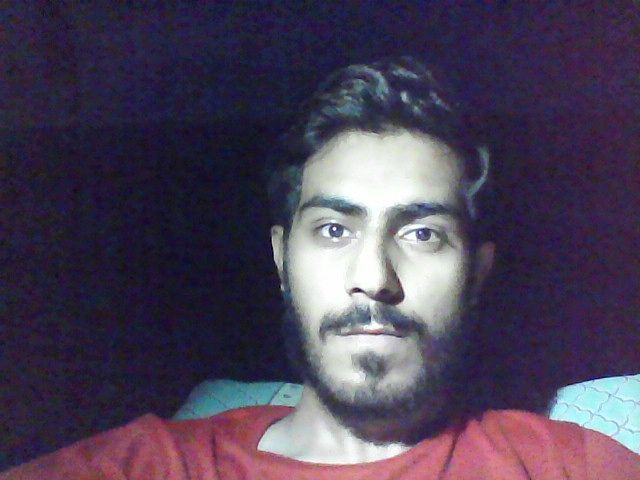

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [10]:
from deepface import DeepFace
import matplotlib.pyplot as plt

In [12]:
Facenet_verification = DeepFace.verify(img1_path="abuzar.jpg", img2_path="photo.jpg", model_name="Facenet")

In [14]:
print(Facenet_verification)

{'verified': True, 'distance': 0.042428135486143326, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


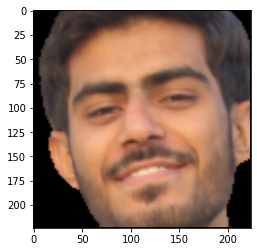

In [24]:
bg_removed_img = DeepFace.detectFace("Profile_Pic-removebg-preview.png")

plt.imshow(bg_removed_img)

In [25]:
VGGFace_verification = DeepFace.verify(img1_path="abuzar.jpg", img2_path="Profile_Pic-removebg-preview.png", model_name="VGG-Face")

In [26]:
print(VGGFace_verification)

{'verified': True, 'distance': 0.24065606841040466, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [28]:
analysis = DeepFace.analyze(img_path="Profile_Pic-removebg-preview.png")

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 77.0MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:45<00:00, 11.9MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:18<00:00, 28.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:16<00:00, 31.9MB/s]
Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


In [29]:
print(analysis)

{'emotion': {'angry': 0.835674162954092, 'disgust': 0.006339769606711343, 'fear': 0.08925787406042218, 'happy': 1.9643787294626236, 'sad': 87.50301599502563, 'surprise': 0.00043724680836021435, 'neutral': 9.600894898176193}, 'dominant_emotion': 'sad', 'region': {'x': 168, 'y': 44, 'w': 111, 'h': 111}, 'age': 29, 'gender': 'Man', 'race': {'asian': 0.7258375640958548, 'indian': 40.573373436927795, 'black': 0.8911461569368839, 'white': 12.514184415340424, 'middle eastern': 26.63596272468567, 'latino hispanic': 18.659493327140808}, 'dominant_race': 'indian'}


In [30]:
analysis

{'age': 29,
 'dominant_emotion': 'sad',
 'dominant_race': 'indian',
 'emotion': {'angry': 0.835674162954092,
  'disgust': 0.006339769606711343,
  'fear': 0.08925787406042218,
  'happy': 1.9643787294626236,
  'neutral': 9.600894898176193,
  'sad': 87.50301599502563,
  'surprise': 0.00043724680836021435},
 'gender': 'Man',
 'race': {'asian': 0.7258375640958548,
  'black': 0.8911461569368839,
  'indian': 40.573373436927795,
  'latino hispanic': 18.659493327140808,
  'middle eastern': 26.63596272468567,
  'white': 12.514184415340424},
 'region': {'h': 111, 'w': 111, 'x': 168, 'y': 44}}